In [1]:
import pandas as pd
import numpy as np
import os
from copy import copy
import matplotlib.pyplot as plt
import pickle

/tmp/ipykernel_44600/4081372255.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
full_result = pd.read_csv('/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/full_results_combined.csv')

# full_result = full_result[full_result['solving_method'] == 'coarse']
# full_result = full_result[full_result['camera_type']=='lietorch']

result_res48 = pd.read_csv('/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_res4/full_results_combined_res48.csv')

data_sparse = pd.read_csv('/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/sparse_full_results_combined.csv')

/tmp/ipykernel_44600/3803148220.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  full_result = pd.read_csv('/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/full_results_combined.csv')


In [4]:
full_result.columns

Index(['Unnamed: 0', 'room_name', 'experiments_base_dir', 'ply_path',
       'pickle_path', 'init_id', 'iou_bin', 'frame_name', 'camera_type',
       'loss_type', 'optimizer_type', 'iterations', 'exit_psnr_parameter',
       'pose_lr_init', 'pose_lr_final', 'pose_lr_delay_steps',
       'pose_lr_delay_mult', 'init_render_resolution', 'solving_method_args',
       'solving_method', 'image_original_path', 'width_original',
       'height_original', 'cx_original', 'cy_original', 'FovX', 'FovY', 'R_gt',
       't_gt', 'qvec_gt', 'black_pixels_ratio', 'init_outside', 'iou_value',
       'qtvec_init', 'psnr_init', 'ssim_init', 'lpips_init', 'loss_init',
       'qtvec_result', 'psnr_result', 'ssim_result', 'lpips_result',
       'loss_result', 'iterations_to_result', 'converged', 'num_tries',
       'success', 'R_result', 't_result', 'rot_err_deg', 't_error_cm',
       'success_rot', 'success_t', 'success_combined'],
      dtype='object')

In [8]:
full_result['solving_method_args'][0]

"{'max_scale': 2, 'num_tries': 5, 'blur_2d_c2f_kernel_size': 201, 'blur_2d_c2f_schedule': [0.05, 0.025, 0.0125, 0.00625, 0.00625, 0.0, 0.0, 0.0, 0.0, 0.0]}"

### Resolution ablation

In [42]:
result_res48['unique_id'] = (result_res48['pickle_path'] + result_res48['init_id'].astype(str) + result_res48['iou_bin'].astype(str) + result_res48['frame_name'].astype(str))

full_result['unique_id'] = (full_result['pickle_path'] + full_result['init_id'].astype(str) + full_result['iou_bin'].astype(str) + full_result['frame_name'].astype(str))

In [43]:
result_res2_combined = full_result[full_result['unique_id'].isin(result_res48['unique_id'])].groupby(['room_name', 'frame_name', 'iou_bin'], as_index=False).mean('success_combined').groupby('iou_bin').mean('success_combined')
result_res2_rot = full_result[full_result['unique_id'].isin(result_res48['unique_id'])].groupby(['room_name', 'frame_name', 'iou_bin'], as_index=False).mean('success_rot').groupby('iou_bin').mean('success_rot')
result_res2_t = full_result[full_result['unique_id'].isin(result_res48['unique_id'])].groupby(['room_name', 'frame_name', 'iou_bin'], as_index=False).mean('success_t').groupby('iou_bin').mean('success_t')

result_res4_combined = result_res48[result_res48['init_render_resolution'] == 4].groupby(['room_name', 'frame_name', 'iou_bin'], as_index=False).mean('success_combined').groupby('iou_bin').mean('success_combined')
result_res4_rot = result_res48[result_res48['init_render_resolution'] == 4].groupby(['room_name', 'frame_name', 'iou_bin'], as_index=False).mean('success_rot').groupby('iou_bin').mean('success_rot')
result_res4_t = result_res48[result_res48['init_render_resolution'] == 4].groupby(['room_name', 'frame_name', 'iou_bin'], as_index=False).mean('success_t').groupby('iou_bin').mean('success_t')

result_res8_combined = result_res48[result_res48['init_render_resolution'] == 8].groupby(['room_name', 'frame_name', 'iou_bin'], as_index=False).mean('success_combined').groupby('iou_bin').mean('success_combined')
result_res8_rot = result_res48[result_res48['init_render_resolution'] == 8].groupby(['room_name', 'frame_name', 'iou_bin'], as_index=False).mean('success_rot').groupby('iou_bin').mean('success_rot')
result_res8_t = result_res48[result_res48['init_render_resolution'] == 8].groupby(['room_name', 'frame_name', 'iou_bin'], as_index=False).mean('success_t').groupby('iou_bin').mean('success_t')

In [45]:
out_dir = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/plot_csvs'

result_res2_combined.to_csv(os.path.join(out_dir, 'res2_combined.csv'))
result_res2_rot.to_csv(os.path.join(out_dir, 'res2_rot.csv'))
result_res2_t.to_csv(os.path.join(out_dir, 'res2_t.csv'))

result_res4_combined.to_csv(os.path.join(out_dir, 'res4_combined.csv'))
result_res4_rot.to_csv(os.path.join(out_dir, 'res4_rot.csv'))
result_res4_t.to_csv(os.path.join(out_dir, 'res4_t.csv'))

result_res8_combined.to_csv(os.path.join(out_dir, 'res8_combined.csv'))
result_res8_rot.to_csv(os.path.join(out_dir, 'res8_rot.csv'))
result_res8_t.to_csv(os.path.join(out_dir, 'res8_t.csv'))

In [25]:
out_dir = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/plot_csvs'

result_res2_combined[result_res2_combined['success_combined']==1].to_csv(os.path.join(out_dir, 'res2_combined.csv'))
result_res2_rot[result_res2_rot['success_rot']==1].to_csv(os.path.join(out_dir, 'res2_rot.csv'))
result_res2_t[result_res2_t['success_t']==1].to_csv(os.path.join(out_dir, 'res2_t.csv'))

result_res4_combined[result_res4_combined['success_combined']==1].to_csv(os.path.join(out_dir, 'res4_combined.csv'))
result_res4_rot[result_res4_rot['success_rot']==1].to_csv(os.path.join(out_dir, 'res4_rot.csv'))
result_res4_t[result_res4_t['success_t']==1].to_csv(os.path.join(out_dir, 'res4_t.csv'))

result_res8_combined[result_res8_combined['success_combined']==1].to_csv(os.path.join(out_dir, 'res8_combined.csv'))
result_res8_rot[result_res8_rot['success_rot']==1].to_csv(os.path.join(out_dir, 'res8_rot.csv'))
result_res8_t[result_res8_t['success_t']==1].to_csv(os.path.join(out_dir, 'res8_t.csv'))

In [6]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(full_result[full_result['unique_id'].isin(result_res48['unique_id'])].groupby(['camera_type', 'solving_method', 'iou_bin'], as_index=False)['success_combined'].value_counts(normalize=True))

   camera_type solving_method  iou_bin  success_combined  proportion
0     lietorch         coarse     0.05                 0       0.827
1     lietorch         coarse     0.05                 1       0.173
2     lietorch         coarse     0.10                 0       0.718
3     lietorch         coarse     0.10                 1       0.282
4     lietorch         coarse     0.15                 0       0.592
5     lietorch         coarse     0.15                 1       0.408
6     lietorch         coarse     0.20                 1       0.537
7     lietorch         coarse     0.20                 0       0.463
8     lietorch         coarse     0.25                 1       0.644
9     lietorch         coarse     0.25                 0       0.356
10    lietorch         coarse     0.30                 1       0.713
11    lietorch         coarse     0.30                 0       0.287
12    lietorch         coarse     0.35                 1       0.762
13    lietorch         coarse     

### Main results and method ablation

In [55]:
data_sparse['success_t'].value_counts(normalize=True)

success_t
1    0.85
0    0.15
Name: proportion, dtype: float64

In [9]:
full_result_coarse = full_result[full_result['solving_method'] == 'vanilla']
full_result_coarse_lie = full_result_coarse[full_result_coarse['camera_type']=='lietorch']

In [95]:
full_result_vanilla = full_result[full_result['solving_method'] == 'vanilla']
full_result_vanilla_lie = full_result_vanilla[full_result_vanilla['camera_type']=='lietorch']

In [117]:
full_result_vanilla_coarse_lie = copy(full_result_vanilla_lie)
full_result_vanilla_coarse_lie['success_combined'] = ((np.array(full_result_coarse_lie['success_combined']) + \
                                                       np.array(full_result_vanilla_lie['success_combined'])) > 0).astype(int)

full_result_vanilla_coarse_lie['success_rot'] = ((np.array(full_result_coarse_lie['success_rot']) + \
                                                       np.array(full_result_vanilla_lie['success_rot'])) > 0).astype(int)

full_result_vanilla_coarse_lie['success_t'] = ((np.array(full_result_coarse_lie['success_t']) + \
                                                       np.array(full_result_vanilla_lie['success_t'])) > 0).astype(int)

full_result_vanilla_coarse_lie['solving_method'] = 'vanilla-coarse'

In [122]:
full_result_coarse_lie.groupby(['room_name', 'frame_name', 'iou_bin',]).mean('success_commbined').groupby('iou_bin').mean('success_combined').to_csv(os.path.join(out_dir, 'ablation_coarse_qtvec.csv'))

In [ ]:
full_result_coarse_lie.groupby(['room_name', 'solving_method', 'iou_bin'], as_index=False)['success_combined'].value_counts(normalize=True)

### Vladnet initialized results and rebase synthetic

In [310]:
base_path = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_task_base_vladnet/full_results_task_base_vladnet.csv'
base_results = pd.read_csv(base_path)

In [282]:
rebase_path = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_task_rebase_vladnet/full_results_task_rebase_vladnet.csv'
rebase_results = pd.read_csv(rebase_path)
base_results_1 = base_results[base_results['room_name'].isin(rebase_results['room_name'].unique())]

In [306]:
base_results['t_error_cm'][base_results['success_t'] == 1].mean(), base_results['t_error_cm'][base_results['success_t'] == 1].median()

(0.005106323588033776, 0.0030851210213326)

In [307]:
base_results['rot_err_deg'][base_results['success_rot'] == 1].mean(), base_results['rot_err_deg'][base_results['success_rot'] == 1].median()

(0.15419919156349773, 0.0561267121336467)

In [293]:
base_results['psnr_result'][base_results['success_t'] == 1].mean()

35.52886616679236

In [205]:
base_rebase_results = pd.concat([base_results_1, rebase_results])

In [206]:
vladnet_groups = base_rebase_results.groupby(['room_name', 'frame_name']).mean('success_combined')
vladnet_groups['success_combined'].groupby('room_name').value_counts(normalize=True)

room_name    success_combined
apartment_1  0.0                 0.31250
             0.1                 0.12500
             0.5                 0.12500
             0.2                 0.09375
             0.4                 0.09375
             0.7                 0.09375
             0.3                 0.06250
             0.6                 0.06250
             0.8                 0.03125
office_2     0.0                 0.15625
             0.6                 0.15625
             0.3                 0.12500
             0.5                 0.12500
             0.4                 0.09375
             0.7                 0.09375
             0.9                 0.09375
             0.1                 0.06250
             0.8                 0.06250
             0.2                 0.03125
Name: proportion, dtype: float64

In [207]:
vladnet_groups_base = base_results_1.groupby(['room_name', 'frame_name']).mean('success_combined')
vladnet_groups_base['success_combined'].groupby('room_name').value_counts(normalize=True)

room_name    success_combined
apartment_1  0.0                 0.43750
             0.6                 0.21875
             0.2                 0.18750
             1.0                 0.12500
             0.8                 0.03125
office_2     1.0                 0.37500
             0.0                 0.25000
             0.2                 0.12500
             0.6                 0.12500
             0.4                 0.09375
             0.8                 0.03125
Name: proportion, dtype: float64

In [208]:
vladnet_groups_base = base_results.groupby(['room_name', 'frame_name']).mean('success_combined')
vladnet_groups_base['success_combined'].groupby('room_name').value_counts(normalize=True)

room_name    success_combined
apartment_0  0.8                 0.34375
             0.0                 0.31250
             1.0                 0.18750
             0.4                 0.09375
             0.2                 0.03125
             0.6                 0.03125
apartment_1  0.0                 0.43750
             0.6                 0.21875
             0.2                 0.18750
             1.0                 0.12500
             0.8                 0.03125
office_0     1.0                 0.50000
             0.0                 0.18750
             0.8                 0.18750
             0.4                 0.06250
             0.6                 0.06250
office_2     1.0                 0.37500
             0.0                 0.25000
             0.2                 0.12500
             0.6                 0.12500
             0.4                 0.09375
             0.8                 0.03125
office_4     1.0                 0.50000
             0.6           

In [197]:
base_results_1 = base_results[base_results['room_name'].isin(rebase_results['room_name'].unique())]
base_results_1.groupby(['room_name', 'frame_name']).mean('iou_value')['iou_value'].mean()

0.3172864153449425

In [200]:
data_sparse.groupby('room_name')['success_combined'].value_counts(normalize=True)

room_name    success_combined
apartment_0  1                   0.81250
             0                   0.18750
apartment_1  1                   0.84375
             0                   0.15625
office_0     1                   0.90625
             0                   0.09375
office_2     1                   0.71875
             0                   0.28125
office_4     1                   0.96875
             0                   0.03125
Name: proportion, dtype: float64

### Vladnet initialized results and rebase real

In [250]:
base_path = '/mnt/sdb1/home/kbotashev/iros_paper/ibr_dataset/results/full_results_combined.csv'
base_results = pd.read_csv(base_path)

In [252]:
vladnet_groups_base = base_results.groupby(['room_name', 'frame_name']).mean('success_combined')
vladnet_groups_base['success_combined'].groupby('room_name').value_counts(normalize=True)

room_name  success_combined
drjohnson  0.2                 0.312500
           0.6                 0.312500
           0.4                 0.156250
           0.0                 0.125000
           1.0                 0.062500
           0.8                 0.031250
playroom   0.4                 0.241379
           0.0                 0.206897
           0.2                 0.206897
           0.6                 0.206897
           0.8                 0.068966
           1.0                 0.068966
Name: proportion, dtype: float64

### Blur image example

In [11]:
full_result_coarse_lie_iou = full_result_coarse_lie[full_result_coarse_lie['iou_bin'] == 0.1]

In [13]:
full_result_coarse_lie_iou_suc = full_result_coarse_lie_iou[full_result_coarse_lie_iou['success_combined'] == 1]

In [17]:
full_result_coarse_lie_iou_suc

,Unnamed: 0,room_name,experiments_base_dir,ply_path,pickle_path,init_id,iou_bin,frame_name,camera_type,loss_type,...,converged,num_tries,success,R_result,t_result,rot_err_deg,t_error_cm,success_rot,success_t,success_combined
50948,50948,apartment_1,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,10,0.1,12,lietorch,l1,...,True,0.0,1,"[[-0.9454135864408784, -0.32587281785273703, 0...","[2.41605806350708, -0.9588576555252075, 4.8071...",0.023107,0.002012,1,1,1
50957,50957,apartment_1,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,8,0.1,12,lietorch,l1,...,True,0.0,1,"[[-0.9454283925237306, -0.32583019026064974, 0...","[2.415797710418701, -0.9588268995285034, 4.807...",0.000000,0.001834,1,1,1
51272,51272,apartment_1,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,7,0.1,7,lietorch,l1,...,True,0.0,1,"[[-0.9994135838025002, 0.034237718694181796, -...","[0.36625730991363525, 3.211153984069824, 3.038...",0.048833,0.004674,1,1,1
51756,51756,apartment_1,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,49,0.1,27,lietorch,l1,...,True,0.0,1,"[[0.615781506423069, -0.7879170051917583, -9.7...","[0.637495756149292, -1.3657352924346924, -1.23...",0.000000,0.000902,1,1,1
51757,51757,apartment_1,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,22,0.1,27,lietorch,l1,...,True,0.0,1,"[[0.615706438397579, -0.7879756309040502, 0.00...","[0.6375510692596436, -1.3665440082550049, -1.2...",0.000000,0.000839,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75939,75939,office_4,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,10,0.1,18,lietorch,l1,...,True,0.0,1,"[[-0.9961830224324899, -0.08728636131280076, -...","[3.9998726844787598, -0.1098853349685669, 2.70...",0.041295,0.001810,1,1,1
75941,75941,office_4,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,47,0.1,18,lietorch,l1,...,True,0.0,1,"[[-0.9961842006040982, -0.08727960537839508, -...","[3.9996399879455566, -0.11016634106636047, 2.7...",0.000000,0.001618,1,1,1
76101,76101,office_4,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,22,0.1,25,lietorch,l1,...,True,0.0,0,"[[-0.19051453036806976, 0.9816844569055938, 5....","[1.9682679176330566, 0.01568714529275894, 4.25...",0.040240,0.003178,1,1,1
76105,76105,office_4,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,/mnt/sdb1/home/kbotashev/iros_paper/replica_da...,4,0.1,25,lietorch,l1,...,True,0.0,0,"[[-0.19041049379622166, 0.9817046751752372, 0....","[1.967658519744873, 0.015644222497940063, 4.25...",0.026124,0.003496,1,1,1


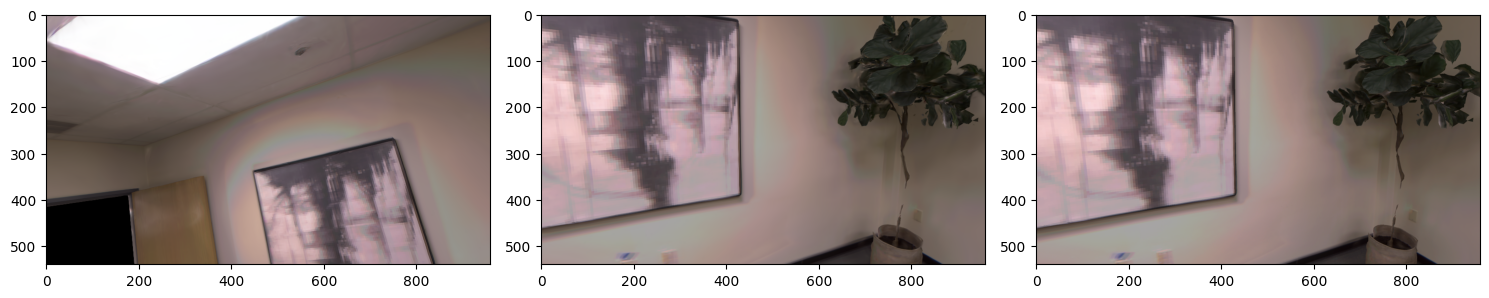

In [41]:
pickle_path_orig = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/solutions/lietorch_l1_adam_2_2000_0.01_1e-05_0_0_5e-05_coarse_max_scale--2-num_tries--5-blur_2d_c2f_kernel_size--201-blur_2d_c2f_schedule--0.05-0.025-0.0125-0.00625-0.00625-0.0-0.0-0.0-0.0-0.0/apartment_1/00013/010/006_010_00013_1.pickle'
# pickle_path_orig = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/solutions/lietorch_l1_adam_2_2000_0.01_1e-05_0_0_5e-05_vanilla_None/apartment_1/00013/010/006_010_00013_0.pickle'
with open(pickle_path_orig, 'rb') as f:
    res = pickle.load(f)
f, axarr = plt.subplots(1,3, figsize = (15,5))
axarr[0].imshow((res['image_init']))
axarr[1].imshow(res['image_result'])
axarr[2].imshow(res['image_gt'])
plt.tight_layout()
plt.show()

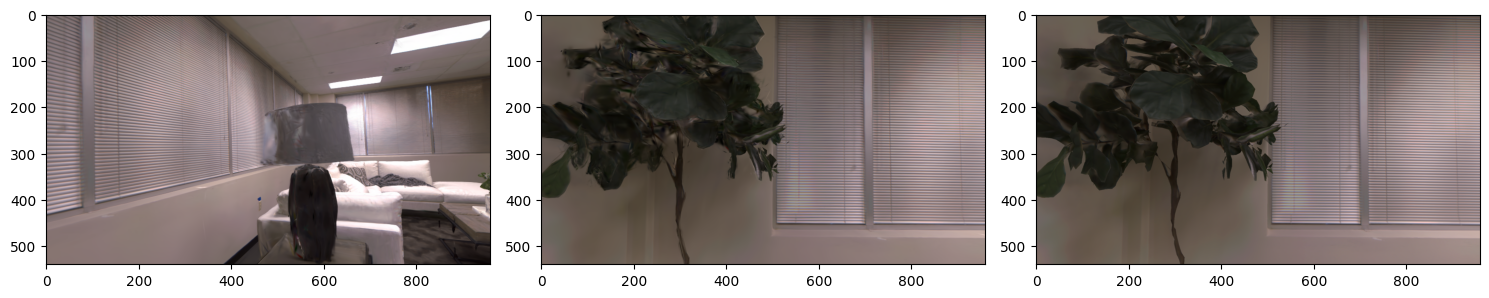

In [44]:
# pickle_path_orig = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/solutions/lietorch_l1_adam_2_2000_0.01_1e-05_0_0_5e-05_vanilla_None/apartment_1/00014/005/005_005_00014_0.pickle'
pickle_path_orig = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/solutions/lietorch_l1_adam_2_2000_0.01_1e-05_0_0_5e-05_coarse_max_scale--2-num_tries--5-blur_2d_c2f_kernel_size--201-blur_2d_c2f_schedule--0.05-0.025-0.0125-0.00625-0.00625-0.0-0.0-0.0-0.0-0.0/apartment_1/00014/005/005_005_00014_1.pickle'
with open(pickle_path_orig, 'rb') as f:
    res = pickle.load(f)
f, axarr = plt.subplots(1,3, figsize = (15,5))
axarr[0].imshow((res['image_init']))
axarr[1].imshow(res['image_result'])
axarr[2].imshow(res['image_gt'])
plt.tight_layout()
plt.show()

In [48]:
import numpy as np
np.random.seed(42)
import torch
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
import random
random.seed(42)
import os
from gaussian_renderer import render_lie, render_qtvec
from arguments import  pose_estimation_params
from gaussian_renderer import GaussianModel
from utils.image_utils import psnr
from utils.loss_utils import l1_loss, ssim, l2_loss
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity as LPIPS
from utils.camera_utils import loadCam
from collections import namedtuple
from scene.gaussian_model import GaussianModel
import pickle
from scene.dataset_readers import CameraInfo
from PIL import Image
from arguments import  pose_estimation_params
from utils.general_utils import get_expon_lr_func
import cv2
from glob import glob
import copy
import json
import fire
import kernels
import torch.nn.functional as torch_F
import tqdm
import shutil
import torchvision

def interp_schedule(x, schedule, left=0, right=1):
    # linear interprete between a list of schedule values
    assert left <= x and right >= x
    if isinstance(schedule, torch.Tensor):
        schedule = schedule.cpu().detach().numpy()
    if isinstance(x, torch.Tensor):
        x = x.cpu().detach().numpy()
    xs = np.linspace(left, right, len(schedule))
    return np.interp(x, xs, schedule)

def get_number_of_max_iou_iters(num, max_iters=64):
    return num if num < max_iters else max_iters

def get_render_func(camera_type):
    if camera_type == 'qtvec':
        render = render_qtvec
    elif camera_type == 'lietorch':
        render = render_lie
    return render

def get_loss_func(loss_type):
    if loss_type == 'l1':
        loss_func = l1_loss
    elif loss_type == 'l2':
        loss_func = l2_loss
    return loss_func

def get_optimizer_func(optimizer_type):
    if optimizer_type == 'adam':
        optimizer_func = torch.optim.Adam
    return optimizer_func

def image_torch_to_np(image_init):
    norm_image = cv2.normalize(image_init.squeeze().detach().cpu().numpy().transpose(1,2,0), None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    norm_image = norm_image.astype(np.uint8)
    return norm_image

class Solver:
    def __init__(self, camera, optimizer_func, camera_pose_estimation_params):
        
        self.pose_optimizer = optimizer_func([{'params': camera.world_view_transform_, 
                                                 'lr': camera_pose_estimation_params.pose_lr_init, "name": "pose"}], 
                                               lr = camera_pose_estimation_params.pose_lr_init)
        self.pose_scheduler_args = get_expon_lr_func(lr_init=camera_pose_estimation_params.pose_lr_init,
                            lr_final=camera_pose_estimation_params.pose_lr_final,
                            lr_delay_steps=camera_pose_estimation_params.pose_lr_delay_steps, 
                            lr_delay_mult=camera_pose_estimation_params.pose_lr_delay_mult,
                            max_steps=camera_pose_estimation_params.pose_lr_max_steps)
        
    def update_learning_rate_pose(self, iteration, factor = 1):
        ''' Learning rate scheduling per step '''
        for param_group in self.pose_optimizer.param_groups:
            if param_group["name"] == "pose":
                if type(self.pose_scheduler_args) == list:
                    lr = self.pose_scheduler_args[iteration] * factor
                else:
                    lr = self.pose_scheduler_args(iteration) * factor
                param_group['lr'] = lr
                return lr


def solve_vanilla(cam_info_init, task_info, gaussians, solving_args = None):
    args = namedtuple('args', ['resolution', 'data_device'])
    args = args(task_info['init_render_resolution'], 'cuda')
    pipe = namedtuple('pipe', ['convert_SHs_python', 'compute_cov3D_python', 'debug'])
    pipe = pipe(False, False, False)
    bg_color = [0, 0, 0]
    background = torch.tensor(bg_color, dtype=torch.float32, device="cuda")

    camera_type = task_info['camera_type']
    loss_type = task_info['loss_type']
    optimizer_type = task_info['optimizer_type']

    iterations = task_info['iterations']
    exit_psnr_parameter = task_info['exit_psnr_parameter']

    pose_lr_init = task_info['pose_lr_init']
    pose_lr_final = task_info['pose_lr_final']
    pose_lr_delay_steps = task_info['pose_lr_delay_steps']
    pose_lr_delay_mult = task_info['pose_lr_delay_mult']

    render_func = get_render_func(camera_type)
    loss_func = get_loss_func(loss_type)
    optimizer_func = get_optimizer_func(optimizer_type)

    # camera_gt = loadCam(args=args, id = 0, cam_info=cam_info_gt, resolution_scale=1, camera_type=camera_type)
    camera_init = loadCam(args=args, id = 0, cam_info=cam_info_init, resolution_scale=1, camera_type=camera_type)

    pose_solver = Solver(camera_init, optimizer_func, pose_estimation_params(pose_lr_init, pose_lr_final, pose_lr_delay_steps,
                                                            pose_lr_delay_mult, iterations, False))

    prev_psnr = 1000
    max_psnr = -1
    init_psnr = 0
    current_try = 0
    lpips = LPIPS(normalize=True).cuda()
    init_qtvec = camera_init.world_view_transform_
    rendering_init = torch.clamp(render_func(camera_init, gaussians, pipe, background)["render"], 0, 1)
    gt_image = camera_init.original_image.cuda()

    # progress_bar = tqdm(range(0, iterations), desc="Optimizing camera " + str(camera_gt.image_name))
    if camera_type == 'lietorch':
        best_viewpoint_cam = torch.nn.Parameter(camera_init.world_view_transform_[0].data.detach().requires_grad_())
    else:
        best_viewpoint_cam = camera_init.world_view_transform_
    converged = False
    counter = 0
    for iteration in range(0, iterations):        
        image = render_func(camera_init, gaussians, pipe, background)["render"]
        image = torch.clamp(image, 0, 1)
        L1 = loss_func(image, gt_image)
        loss_value = L1
        psnr_value = psnr(image, gt_image).mean().item()
        loss_value.backward()
        render_path = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/images_results_vanilla'
        if iteration % 50 == 0:
                torchvision.utils.save_image(gt_image, os.path.join(render_path, str(iteration) + '_gt.png'))
                torchvision.utils.save_image(image, os.path.join(render_path, str(iteration) + '_pred.png'))

        if iteration == 0:
            loss_init = loss_value.item()

        if psnr_value >= max_psnr:
            max_psnr = psnr_value 
            if camera_type == 'lietorch':
                best_viewpoint_cam = torch.nn.Parameter(camera_init.world_view_transform_[0].data.detach().requires_grad_())
            else:
                best_viewpoint_cam = camera_init.world_view_transform_

        if abs(psnr_value - prev_psnr) <= exit_psnr_parameter:
            counter += 1
            if counter == 3:
                converged = True
                # print('Converged. PSNR optimized as: ' \
                # + format(init_psnr, '.7f') + ' -> ' + format(max_psnr, '.7f'))
                counter = 0
                # progress_bar.close()
                break

        # progress_bar.set_postfix({"Loss": f"{loss_value.item():.{7}f}", 'PSNR' : f"{psnr_value:.{7}f}"})
        # progress_bar.update()
        prev_psnr = psnr_value
        
        init_psnr = psnr_value if iteration == 0 else init_psnr

        with torch.no_grad():
            if camera_type == 'lietorch':
                camera_init.world_view_transform_.grad = camera_init.world_view_transform.grad[:-1].unsqueeze(0)
            pose_solver.update_learning_rate_pose(iteration)
            pose_solver.pose_optimizer.step()
            pose_solver.pose_optimizer.zero_grad(set_to_none = True)
            if camera_type == 'lietorch':
                camera_init.world_view_transform = torch.nn.Parameter(camera_init.world_view_transform_[0].data.detach().requires_grad_())
    # progress_bar.close()

    if camera_type == 'lietorch':
        camera_init.world_view_transform  = best_viewpoint_cam
    else:
        camera_init.world_view_transform_ = best_viewpoint_cam 

    rendering_result = torch.clamp(render_func(camera_init, gaussians, pipe, background)['render'], 0, 1)
    result_psnr = psnr(rendering_result, gt_image).mean().item()
    result_ssim = ssim(rendering_result, gt_image).mean().item()
    result_lpips = lpips(rendering_result.unsqueeze(0), gt_image.unsqueeze(0)).mean().item()

    init_psnr = psnr(rendering_init, gt_image).mean().item()
    init_ssim = ssim(rendering_init, gt_image).mean().item()
    init_lpips = lpips(rendering_init.unsqueeze(0), gt_image.unsqueeze(0)).mean().item()

    success = 1 if result_psnr > 25 else 0

    return {'qtvec_init':init_qtvec.detach().cpu().numpy(),
            'psnr_init':init_psnr,
            'ssim_init':init_ssim,
            'lpips_init':init_lpips,
            'loss_init':loss_init,
            'image_init':image_torch_to_np(rendering_init),
            'image_gt':image_torch_to_np(gt_image),

            'qtvec_result':best_viewpoint_cam.detach().cpu().numpy(),
            'psnr_result':result_psnr,
            'ssim_result':result_ssim,
            'lpips_result':result_lpips,
            'loss_result':loss_value.item(),
            'image_result':image_torch_to_np(rendering_result),
            'iterations_to_result':iteration,
            'converged':converged,
            'num_tries':current_try,
            'success':success,
            }

def blur_image(gt_image, iteration, iterations, 
               max_scale, blur_2d_c2f_kernel_size, 
               blur_2d_c2f_schedule,
               init_render_resolution):
    H = gt_image.shape[1]
    W = gt_image.shape[2]
    c2f_alternate_2D_mode = False
    device = torch.device('cuda')

    # blur_2d_c2f_schedule = [0.05, 0.025, 0.0125, 0.00625, 0.00625, 0.0, 0.0, 0.0, 0.0, 0.0]
    # blur_2d_c2f_schedule = [0.025, 0.0125, 0.00625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    # blur_2d_c2f_kernel_size = 201
    # max_scale = 1
    
    blur_2d_c2f_kernel_size_used = int(blur_2d_c2f_kernel_size/init_render_resolution) + 1

    if c2f_alternate_2D_mode == "sample":
        scales = [0.0, 0.25, 0.5, 0.75, 1.0]
    else:
        # scales = [0.0, max_scale]
        scales = [max_scale]
    # get kernels
    kernels_dict = dict() # dictionary from scale to kernel
    for sc in scales:
        blur_param = interp_schedule(float(iteration/iterations), blur_2d_c2f_schedule)
        blur_param = torch.tensor(blur_param, device=device)
        blur_param *= sc
        # get kernel

        kernel_width = blur_param * (W + H)/2
        kernel_1d = kernels.get_gaussian_kernel(kernel_width, blur_2d_c2f_kernel_size_used)

        kernel_1d = kernel_1d.to(device=device,dtype=torch.float32)

        kernel_1d = kernel_1d.expand(1,1,-1)

        kernels_dict[sc] = (kernel_1d, kernel_width)

    # generte blurred GT images
    blurred_gt_cached_images = dict()

    for sc, k in kernels_dict.items():
        kernel_1d, kernel_width = k
        # skip kernel if kernel_width too small
        if kernel_width < 0.01:
            images = gt_image
        else:
            # perform 2D seperated convolution
            images = gt_image
            kernel_size = kernel_1d.shape[-1]
            pad_size= (kernel_size //2, kernel_size //2)
            images = torch_F.pad(images, pad_size, mode="replicate")
            images = torch_F.conv1d(images, kernel_1d.expand(H,1,-1), bias=None, stride=1, padding=0, dilation=1, groups=H)
            images = images.permute(0,2,1)
            images = torch_F.pad(images, pad_size, mode="replicate")
            images = torch_F.conv1d(images, kernel_1d.expand(W,1,-1), bias=None, stride=1, padding=0, dilation=1, groups=W)
            images = images.permute(0,2,1).reshape(1, 3, H, W).contiguous()
        blurred_gt_cached_images[sc] = images
    return blurred_gt_cached_images


def solve_coarse(cam_info_init, task_info, gaussians, solving_args = None):
    args = namedtuple('args', ['resolution', 'data_device'])
    args = args(task_info['init_render_resolution'], 'cuda')
    pipe = namedtuple('pipe', ['convert_SHs_python', 'compute_cov3D_python', 'debug'])
    pipe = pipe(False, False, False)
    bg_color = [0, 0, 0]
    background = torch.tensor(bg_color, dtype=torch.float32, device="cuda")

    camera_type = task_info['camera_type']
    loss_type = task_info['loss_type']
    optimizer_type = task_info['optimizer_type']

    iterations = task_info['iterations']
    exit_psnr_parameter = task_info['exit_psnr_parameter']

    pose_lr_init = task_info['pose_lr_init']
    pose_lr_final = task_info['pose_lr_final']
    pose_lr_delay_steps = task_info['pose_lr_delay_steps']
    pose_lr_delay_mult = task_info['pose_lr_delay_mult']

    render_func = get_render_func(camera_type)
    loss_func = get_loss_func(loss_type)
    optimizer_func = get_optimizer_func(optimizer_type)

    # camera_gt = loadCam(args=args, id = 0, cam_info=cam_info_gt, resolution_scale=1, camera_type=camera_type)
    camera_init = loadCam(args=args, id = 0, cam_info=cam_info_init, resolution_scale=1, camera_type=camera_type)

    pose_solver = Solver(camera_init, optimizer_func, pose_estimation_params(pose_lr_init, pose_lr_final, pose_lr_delay_steps,
                                                        pose_lr_delay_mult, iterations, False))
    
    num_tries = solving_args['num_tries']
    max_scale = solving_args['max_scale']
    blur_2d_c2f_kernel_size = solving_args['blur_2d_c2f_kernel_size']
    blur_2d_c2f_schedule = solving_args['blur_2d_c2f_schedule']
    
    current_try = 0
    success = 0
    best_psnr = -1

    while current_try < num_tries and success == 0:
        # if current_try > 1:
        #     max_scale += 1
        prev_psnr = 1000
        max_psnr = -1
        init_psnr = 0

        lpips = LPIPS(normalize=True).cuda()
        init_qtvec = camera_init.world_view_transform_
        if current_try == 0:
            rendering_init = torch.clamp(render_func(camera_init, gaussians, pipe, background)["render"], 0, 1)
        gt_image = camera_init.original_image.cuda()

        # progress_bar = tqdm(range(0, iterations), desc="Optimizing camera ")
        if camera_type == 'lietorch':
            best_viewpoint_cam = torch.nn.Parameter(camera_init.world_view_transform_[0].data.detach().requires_grad_())
        else:
            best_viewpoint_cam = camera_init.world_view_transform_
        converged = False
        counter = 0
        for iteration in range(0, iterations):        
            image = render_func(camera_init, gaussians, pipe, background)["render"]
            image = torch.clamp(image, 0, 1)

            gt_image_blur_dict = blur_image(gt_image, iteration, 
                                            iterations, max_scale=max_scale, 
                                            blur_2d_c2f_kernel_size = blur_2d_c2f_kernel_size,
                                            blur_2d_c2f_schedule = blur_2d_c2f_schedule,
                                            init_render_resolution = task_info['init_render_resolution'])
            image_blur_dict = blur_image(image, iteration, 
                                         iterations, max_scale=max_scale, 
                                        blur_2d_c2f_kernel_size = blur_2d_c2f_kernel_size,
                                        blur_2d_c2f_schedule = blur_2d_c2f_schedule, 
                                        init_render_resolution = task_info['init_render_resolution'])
            render_path = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/images_results_blur'
            if iteration % 50 == 0:
                torchvision.utils.save_image(gt_image_blur_dict[max_scale], os.path.join(render_path, str(iteration) + '_gt.png'))
                torchvision.utils.save_image(image_blur_dict[max_scale], os.path.join(render_path, str(iteration) + '_pred.png'))

            L1 = loss_func(image_blur_dict[max_scale], gt_image_blur_dict[max_scale])
            loss_value = L1
            psnr_value = psnr(image, gt_image).mean().item()
            loss_value.backward()

            if iteration == 0 and current_try == 0:
                loss_init = loss_value.item()

            if psnr_value >= max_psnr:
                max_psnr = psnr_value 
                if camera_type == 'lietorch':
                    best_viewpoint_cam = torch.nn.Parameter(camera_init.world_view_transform_[0].data.detach().requires_grad_())
                else:
                    best_viewpoint_cam = camera_init.world_view_transform_

            if psnr_value >= best_psnr:
                best_psnr = psnr_value
                if camera_type == 'lietorch':
                    best_try_camera = torch.nn.Parameter(camera_init.world_view_transform_[0].data.detach().requires_grad_())
                else:
                    best_try_camera = camera_init.world_view_transform_

            if abs(psnr_value - prev_psnr) <= exit_psnr_parameter:
                counter += 1
                if counter == 3:
                    converged = True
                    print('Converged. PSNR optimized as: ' \
                    + format(init_psnr, '.7f') + ' -> ' + format(max_psnr, '.7f'))
                    counter = 0
                    # progress_bar.close()
                    break
            
            # progress_bar.set_postfix({"Loss": f"{loss_value.item():.{7}f}", 'PSNR' : f"{psnr_value:.{7}f}"})
            # progress_bar.update()
            prev_psnr = psnr_value
            
            init_psnr = psnr_value if iteration == 0 else init_psnr

            with torch.no_grad():
                if camera_type == 'lietorch':
                    camera_init.world_view_transform_.grad = camera_init.world_view_transform.grad[:-1].unsqueeze(0)
                pose_solver.update_learning_rate_pose(iteration)
                pose_solver.pose_optimizer.step()
                pose_solver.pose_optimizer.zero_grad(set_to_none = True)
                if camera_type == 'lietorch':
                    camera_init.world_view_transform = torch.nn.Parameter(camera_init.world_view_transform_[0].data.detach().requires_grad_())
        # progress_bar.close()

        if camera_type == 'lietorch':
            camera_init.world_view_transform  = best_viewpoint_cam
        else:
            camera_init.world_view_transform_ = best_viewpoint_cam 

        rendering_result = torch.clamp(render_func(camera_init, gaussians, pipe, background)['render'], 0, 1)
        result_psnr = psnr(rendering_result, gt_image).mean().item()
        result_ssim = ssim(rendering_result, gt_image).mean().item()
        result_lpips = lpips(rendering_result.unsqueeze(0), gt_image.unsqueeze(0)).mean().item()

        if current_try == 0:
            init_psnr = psnr(rendering_init, gt_image).mean().item()
            init_ssim = ssim(rendering_init, gt_image).mean().item()
            init_lpips = lpips(rendering_init.unsqueeze(0), gt_image.unsqueeze(0)).mean().item()

        success = 1 if result_psnr > 25 else 0
        current_try += 1
    
    if camera_type == 'lietorch':
        camera_init.world_view_transform  = best_try_camera
    else:
        camera_init.world_view_transform_ = best_try_camera 

    rendering_result = torch.clamp(render_func(camera_init, gaussians, pipe, background)['render'], 0, 1)
    result_psnr = psnr(rendering_result, gt_image).mean().item()
    result_ssim = ssim(rendering_result, gt_image).mean().item()
    result_lpips = lpips(rendering_result.unsqueeze(0), gt_image.unsqueeze(0)).mean().item()

    success = 1 if result_psnr > 25 else 0
    
    return {'qtvec_init':init_qtvec.detach().cpu().numpy(),
            'psnr_init':init_psnr,
            'ssim_init':init_ssim,
            'lpips_init':init_lpips,
            'loss_init':loss_init,
            'image_init':image_torch_to_np(rendering_init),
            'image_gt':image_torch_to_np(gt_image),

            'qtvec_result':best_viewpoint_cam.detach().cpu().numpy(),
            'psnr_result':result_psnr,
            'ssim_result':result_ssim,
            'lpips_result':result_lpips,
            'loss_result':loss_value.item(),
            'image_result':image_torch_to_np(rendering_result),
            'iterations_to_result':iteration,
            'converged':converged,
            'num_tries':current_try,
            'success':success,
            }


def get_solving_func(solving_method):
    if solving_method == 'vanilla':
        solving_func = solve_vanilla
    if solving_method == 'coarse':
        solving_func = solve_coarse
    return solving_func

In [49]:
room_name = 'apartment_1'
start_frame = 12
end_frame = 13
camera_type = 'lietorch'
solving_method = 'vanilla'

solving_method_args_={ 
                        'max_scale':2,
                        'num_tries':5,
                        'blur_2d_c2f_kernel_size':400,
                        'blur_2d_c2f_schedule':[0.05, 0.025, 0.0125, 0.00625, 0.00625, 0.0, 0.0, 0.0, 0.0, 0.0],
                    }
loss_type='l1'
optimizer_type='adam'
init_render_resolution=2
iterations=2000
exit_psnr_parameter=5e-5
pose_lr_init=0.01
pose_lr_final=1e-5
pose_lr_delay_steps=0
pose_lr_delay_mult=0
results_root='/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/solutions'

solving_method_args = None if solving_method == 'vanilla' else solving_method_args_
os.makedirs(results_root, exist_ok=True)
# json_task_paths_frameroot_template = '/mnt/sdb1/home/kbotashev/iros_paper/ibr_dataset/results/tasks/@room_name@/*'
json_task_paths_template = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_task_rebase_vladnet/tasks/@room_name@/@frame_num@/*/*.json'
experiments_base_dir = results_root.split('/results')[0]

ply_path = os.path.join(experiments_base_dir, 
                        'output', room_name, 
                        'point_cloud/iteration_40000/point_cloud.ply')

gaussians = GaussianModel(sh_degree=3)
gaussians.load_ply(ply_path)

frame_nums = np.arange(start_frame, end_frame)
# frame_dirs = sorted(glob(json_task_paths_frameroot_template.replace('@room_name@', room_name)))
json_task_paths = []
for frame_num in frame_nums:
    # json_task_paths += glob(os.path.join(frame_dirs[frame_num], '*/*.json'))
    json_task_paths += glob(json_task_paths_template.replace('@room_name@', room_name).replace('@frame_num@', str(frame_num).zfill(5)))
json_task_paths = np.array(json_task_paths)

sorted_json_task_paths = json_task_paths[np.argsort([json_task_path.split('/')[-1].split('.json')[0] for json_task_path in json_task_paths])]

# for json_id, json_task_path in enumerate(sorted_json_task_paths):

json_task_path = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/tasks/apartment_1/00013/010/006_010_00013.json'

json_id = 0

img_name = json_task_path.split('/')[-1].split('_')[-1].split('.json')[0]


with open(json_task_path, 'r') as f:
    task_info = json.load(f)

task_info['camera_type'] = camera_type
task_info['loss_type'] = loss_type
task_info['optimizer_type'] = optimizer_type

task_info['iterations'] = iterations
task_info['exit_psnr_parameter'] = exit_psnr_parameter

task_info['pose_lr_init'] = pose_lr_init
task_info['pose_lr_final'] = pose_lr_final
task_info['pose_lr_delay_steps'] = pose_lr_delay_steps
task_info['pose_lr_delay_mult'] = pose_lr_delay_mult
task_info['init_render_resolution'] = init_render_resolution
task_info['solving_method_args'] = solving_method_args
task_info['solving_method'] = solving_method

print("Solving: " + camera_type + ' ' + solving_method + ' ' + str(json_id) + '/' +
        str(len(sorted_json_task_paths)) + ' ' + json_task_path)

iou_bin = task_info['iou_bin']
index = task_info['init_id']
solving_method = task_info['solving_method']
solving_args = task_info['solving_method_args']
solve_func = get_solving_func(solving_method=solving_method)

solving_method_args_str = str(solving_args).replace(', ', '-').replace('[', '').replace(']', '').replace("'", '').replace(": ", "--").replace('}', '').replace('{', '')
experiment_result_dir = os.path.join(results_root, 
                                str(task_info['camera_type']) + '_' + 
                                str(task_info['loss_type']) + '_' + 
                                str(task_info['optimizer_type']) + '_' + 
                                str(task_info['init_render_resolution']) + '_' + 
                                str(task_info['iterations']) + '_' + 
                                str(task_info['pose_lr_init']) + '_' + 
                                str(task_info['pose_lr_final']) + '_' + 
                                str(task_info['pose_lr_delay_steps']) + '_' + 
                                str(task_info['pose_lr_delay_mult']) + '_' + 
                                str(task_info['exit_psnr_parameter']) + '_' + 
                                str(task_info['solving_method']) + '_' + 
                                solving_method_args_str)

experiment_result_dir = os.path.join(experiment_result_dir, task_info['room_name'], img_name)
experiment_result_dir = os.path.join(experiment_result_dir, ('%.2f'%iou_bin).replace('.', ''))

os.makedirs(experiment_result_dir, exist_ok=True)

with open(task_info['pickle_path'], 'rb') as handle:
    frames_info = pickle.load(handle)

FovY = frames_info['frames']['FovY']
FovX = frames_info['frames']['FovX']
width = frames_info['frames']['width']
height = frames_info['frames']['height']
cx = frames_info['frames']['cx']
cy = frames_info['frames']['cy']

image_gt = Image.fromarray(frames_info['frames']['image'])
image_path = frames_info['frames']['img_path']
image_name = frames_info['img_name']
R_gt = frames_info['frames']['R']
t_gt = frames_info['frames']['T']

# cam_info_gt = CameraInfo(uid=0, R=R_gt, T=t_gt, FovY=FovY, FovX=FovX, image=image_gt,
#                          image_path=image_path, image_name=image_name, width=width,
#                          height=height, qvec = None, cx = cx, cy = cy)

image_init = frames_info['frames']['init_frames_iou_bins'][iou_bin][index]['init_image']
R_init = frames_info['frames']['init_frames_iou_bins'][iou_bin][index]['R_init']
t_init = frames_info['frames']['init_frames_iou_bins'][iou_bin][index]['T_init']

cam_info_init = CameraInfo(uid=0, R=R_init, T=t_init, FovY=FovY, FovX=FovX, image=image_gt,
                        image_path=image_path, image_name=image_name, width=width,
                        height=height, qvec = None, cx = cx, cy = cy)

iou_value = frames_info['frames']['init_frames_iou_bins'][iou_bin][index]['iou']
black_pixels_ratio = frames_info['frames']['init_frames_iou_bins'][iou_bin][index]['black_pixels_ratio']
init_outside = True if black_pixels_ratio > 0.3 else False


result = solve_func(cam_info_init=cam_info_init, task_info=task_info, gaussians=gaussians, solving_args=solving_args)

output_result = copy.copy(task_info)
output_result['image_original_path'] = frames_info['frames']['img_path']
output_result['width_original'] = frames_info['frames']['width']
output_result['height_original'] = frames_info['frames']['height']
output_result['cx_original'] = frames_info['frames']['cx']
output_result['cy_original'] = frames_info['frames']['cy']
output_result['FovX'] = frames_info['frames']['FovX']
output_result['FovY'] = frames_info['frames']['FovY']

output_result['R_gt'] = frames_info['frames']['R']
output_result['t_gt'] = frames_info['frames']['T']
output_result['qvec_gt'] = frames_info['frames']['qvec']
output_result['black_pixels_ratio'] = black_pixels_ratio
output_result['init_outside'] = init_outside
output_result['iou_value'] = iou_value
output_result = output_result | result

pickle_out_path = os.path.join(experiment_result_dir, 
                                json_task_path.split('/')[-1].replace('.json', '_' + str(result['success']) + '.pickle'))

# with open(pickle_out_path, 'wb') as handle:
#     pickle.dump(output_result, handle, protocol=pickle.HIGHEST_PROTOCOL)

Solving: lietorch vanilla 0/5 /mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/tasks/apartment_1/00013/010/006_010_00013.json


### IOU VISUALIZATION

In [158]:
import open3d as o3d
import mrob

from pytorch3d import io
import torch
from pytorch3d.renderer.cameras import FoVPerspectiveCameras, PerspectiveCameras
from pytorch3d.renderer.points.rasterizer import PointsRasterizer, PointsRasterizationSettings
from pytorch3d.structures import Pointclouds
from pytorch3d.utils import cameras_from_opencv_projection 

from scene.dataset_readers import readColmapSceneInfo
from utils.camera_utils import loadCam
from collections import namedtuple
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np
import mrob
from tqdm import tqdm
from joblib import Parallel, delayed

from pytorch3d.renderer import (
    PointsRasterizationSettings,
    PointsRenderer,
    PointsRasterizer,
    NormWeightedCompositor
)

In [164]:
image_pair_path = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset/scenes/apartment_1/apartment_1_task/images_pairs/00005.pickle'
with open(image_pair_path, 'rb') as f:
    res = pickle.load(f)

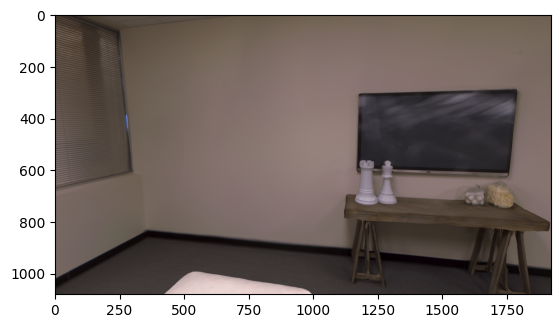

In [165]:
plt.imshow(res['frames']['image'])

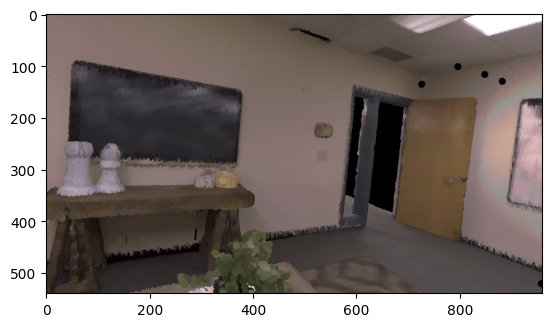

In [167]:
plt.imshow(res['frames']['init_frames_iou_bins'][0.15][10]['init_image'])

In [170]:
res['frames']['init_frames_iou_bins'][0.15][10].keys()

dict_keys(['R_init', 'T_init', 'iou', 'init_fraction_set_idx', 'intersection_idx', 'union_idx', 'init_image'])

In [163]:
res['point_cloud_path']

'/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/scenes/apartment_1/apartment_1_base/sparse/0/points3D.ply'

In [171]:
ply_path = res['point_cloud_path']

pcd_o3d = o3d.io.read_point_cloud(ply_path)
pcd_o3d = pcd_o3d.voxel_down_sample(voxel_size=0.025)
points_tensor = torch.tensor(np.asarray(pcd_o3d.points)).unsqueeze(0).cuda().float()
colors_tensor = torch.tensor(np.asarray(pcd_o3d.colors)).unsqueeze(0).cuda().float()

In [217]:
intersection_indices = res['frames']['init_frames_iou_bins'][0.15][10]['intersection_idx']
gt_indices = res['frames']['gt_fraction_set_idx']

init_indices = res['frames']['init_frames_iou_bins'][0.15][10]['init_fraction_set_idx']

In [225]:
init_points = list(set(init_indices).difference(set(intersection_indices)))

gt_points = list(set(gt_indices).difference(set(intersection_indices)))

In [233]:
point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(np.asarray(pcd_o3d.points)[intersection_indices])
image = np.expand_dims(np.asarray(pcd_o3d.colors)[intersection_indices], 0)
mask = np.zeros(image.shape) + np.array([0,255,0])/255
colors_masked = image * 0.8 + mask * 0.2
point_cloud.colors = o3d.utility.Vector3dVector(colors_masked.squeeze())
point_cloud.normals = o3d.utility.Vector3dVector(np.asarray(pcd_o3d.normals)[intersection_indices])

In [234]:
o3d.io.write_point_cloud('/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/images_iou_visual/points_cam_intersection_green.ply', point_cloud)

True

In [215]:
res['frames']['init_frames_iou_bins'][0.15][10].keys()

dict_keys(['R_init', 'T_init', 'iou', 'init_fraction_set_idx', 'intersection_idx', 'union_idx', 'init_image'])

In [237]:
plt.imsave('/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/images_iou_visual/blue.png', res['frames']['init_frames_iou_bins'][0.15][10]['init_image'])

### Data for the table

In [314]:
data_sparse_suc_rot = data_sparse[data_sparse['success_combined'] == 1]
data_sparse_suc_t = data_sparse[data_sparse['success_combined'] == 1]

print(data_sparse_suc_rot['rot_err_deg'].mean(), data_sparse_suc_rot['rot_err_deg'].median())

print(data_sparse_suc_t['t_error_cm'].mean(), data_sparse_suc_t['t_error_cm'].median())

0.09794158344503631 0.05869662808833355
0.004978340392153965 0.00295008334562395


In [311]:
base_path = '/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_task_base_vladnet/full_results_task_base_vladnet.csv'
base_results = pd.read_csv(base_path)

In [322]:
base_results_suc_rot = base_results[base_results['success_combined'] == 1]
base_results_suc_t = base_results[base_results['success_combined'] == 1]
# base_results['success_combined']

print(base_results_suc_rot['rot_err_deg'].mean(), base_results_suc_rot['rot_err_deg'].median())

print(base_results_suc_t['t_error_cm'].mean(), base_results_suc_t['t_error_cm'].median())

base_results_suc_t['psnr_result'].mean()

0.0901905473234803 0.0539906739776783
0.005106323588033776 0.0030851210213326


35.52886616679236

In [315]:
full_result = pd.read_csv('/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/full_results_combined.csv')

full_result_suc_rot = full_result[full_result['success_combined'] == 1]
full_result_suc_t = full_result[full_result['success_combined'] == 1]
# base_results['success_combined']

print(full_result_suc_rot['rot_err_deg'].mean(), full_result_suc_rot['rot_err_deg'].median())

print(full_result_suc_t['t_error_cm'].mean(), full_result_suc_t['t_error_cm'].median())

0.07865548712365525 0.0
0.005474410835475063 0.0026244555234531


/tmp/ipykernel_56469/2215270915.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  full_result = pd.read_csv('/mnt/sdb1/home/kbotashev/iros_paper/replica_dataset_1/results_methods/full_results_combined.csv')


In [321]:
full_result_suc_rot['psnr_result'].mean()

35.26371693920571